In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/avmain/284b549eabc13061ce2b0b58b163c7f9/raw/ff20885745fea9ab5be6e900aad4c2cb1d08f936/titanic_data_set.csv',error_bad_lines = False)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]
print 'Survived ', survived.head(), '\n\nNot Survived ', not_survived.head()

Survived     PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN    

In [9]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

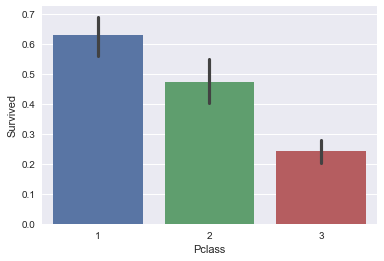

In [10]:
sns.barplot(x='Pclass', y='Survived', data=df)


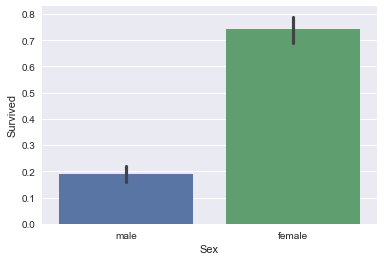

In [11]:
sns.barplot(x='Sex', y='Survived', data=df)

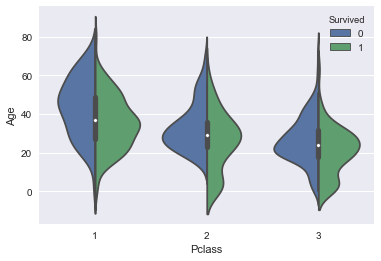

In [12]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

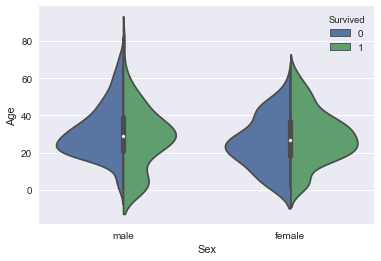

In [13]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

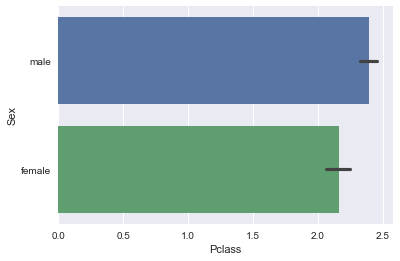

In [14]:
sns.barplot(x='Pclass', y='Sex', data=df)

In [15]:
# Relationship btwn features and survival for pclass and sex

In [16]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df['Gender'] = df.Sex.apply(lambda x:1 if x == 'male' else 0)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Gender         0
dtype: int64

In [22]:
#no missing values found in age
#Missing values in Age code
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer= age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
print df.head()


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  Gender  
1       0  PC 17599  71.2833   C85        C       0  
3       0    113803  53.1000  C123        S       0  
6       0     17463  51.8625   E46        S       1  
10      1   PP 9549  16.7000    G6        S       0  
11      0    113783  26.5500  C103    

In [23]:
#no missing values found in embarked
#missing values in embarked code 
df['Embarked'] = df['Embarked'].fillna('S')


In [24]:
#Encoding Sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])
print df.head()  #Trivia : Why did we not use OneHotEncoder?


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  Gender  
1       0  PC 17599  71.2833   C85        C       0  
3       0    113803  53.1000  C123        S       0  
6       0     17463  51.8625   E46        S       1  
10      1   PP 9549  16.7000    G6        S       0  
11      0    113783  26.5500  C103        S       0  


/Users/Akhil/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
#Encoding Embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
df.iloc[:, [11]] = labelencoder_embarked.fit_transform(df.iloc[:, [11]])
print df.head()

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked  Gender  
1       0  PC 17599  71.2833   C85         0       0  
3       0    113803  53.1000  C123         2       0  
6       0     17463  51.8625   E46         2       1  
10      1   PP 9549  16.7000    G6         2       0  
11      0    113783  26.5500  C103         2       

In [26]:
#One Hot Encoding Pclass and Embarked
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
df.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1,1,0,0,0,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0,0,0,1,0,0,1
11,12,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,0,1,0,0,0,0,1


In [27]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print df.head()

    PassengerId  Survived                                               Name  \
1             2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3             4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6             7         0                            McCarthy, Mr. Timothy J   
10           11         1                    Sandstrom, Miss. Marguerite Rut   
11           12         1                           Bonnell, Miss. Elizabeth   

    Sex   Age  SibSp  Parch    Ticket     Fare Cabin  Gender  Pclass_1  \
1     0  38.0      1      0  PC 17599  71.2833   C85       0         1   
3     0  35.0      1      0    113803  53.1000  C123       0         1   
6     1  54.0      0      0     17463  51.8625   E46       1         1   
10    0   4.0      1      1   PP 9549  16.7000    G6       0         0   
11    0  58.0      0      0    113783  26.5500  C103       0         1   

    Pclass_2  Pclass_3  Embarked_0  Embarked_1  Embarked_2  FamilySize  
1

In [28]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df = df.drop(irrelevant_features, axis=1)
print df.head()

    Survived  Sex   Age     Fare  Gender  Pclass_1  Pclass_2  Pclass_3  \
1          1    0  38.0  71.2833       0         1         0         0   
3          1    0  35.0  53.1000       0         1         0         0   
6          0    1  54.0  51.8625       1         1         0         0   
10         1    0   4.0  16.7000       0         0         0         1   
11         1    0  58.0  26.5500       0         1         0         0   

    Embarked_0  Embarked_1  Embarked_2  FamilySize  
1            1           0           0           2  
3            0           0           1           2  
6            0           0           1           1  
10           0           0           1           3  
11           0           0           1           1  


In [29]:
df.to_csv('titanic_prepared_data.csv', index=0)
df.head()

,Survived,Sex,Age,Fare,Gender,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
1,1,0,38.0,71.2833,0,1,0,0,1,0,0,2
3,1,0,35.0,53.1000,0,1,0,0,0,0,1,2
6,0,1,54.0,51.8625,1,1,0,0,0,0,1,1
10,1,0,4.0,16.7000,0,0,0,1,0,0,1,3
11,1,0,58.0,26.5500,0,1,0,0,0,0,1,1
